# Transient Generator

Como tenemos una señal ya en archivos de Python, solo vamos a necesitar instalar tres librerías.
- *Os* para trabajar entre carpetas
- *Numpy* para operar las señales.
- *Matplotlib* para graficar las señales al final

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

En este script, solo tenemos una sola función "transient_generator".
- Primero hacemos una iteración de todos los archivos de la carpeta que se generó en el script "Signal_Extractor.ipynb".
- Si la ruta es correcta, debería encontrar el archivo, una vez que se encuentra el archivo, para operar se manera más sencilla, se trabajan con señales normalizadas. En este caso se usará la normalizada por el RMS.
- Después simplemente se define el factor de amplitud de la señal, como es un swell, tendrá que ser mayor que la señal nominal en un período de tiempo, los valores están definidos en la norma IEEE 1159.
- ![](https://figures.semanticscholar.org/308ec64d75779240f7fcdcdb8a7787098c605edd/1-TableI-1.png)

- Se elimina el print del final para no generar los 3600 datos en pantalla.
- Respecto a los límites, para poder trabajar dentro de la normal, tenemos que tener un rango de amplificación de entre 0.5 ciclos (0.01 segundo o 100 muestras) a 30 ciclos (0.6 s o 6000 muestras) y los factores de amplitud son de 1.1 a 1.8.

In [2]:
# Obtener el directorio actual del script
directorio_actual = os.path.dirname(os.path.abspath('disturbance_creator'))
directorio_destino = os.path.join(directorio_actual, 'transient_signals')

# Creamos todas las carpetas antes de iniciar el bucle.
print(f"Creando carpetas en: {directorio_destino}")
os.makedirs(directorio_destino, exist_ok=True)
os.makedirs(os.path.join(directorio_destino, 'test'), exist_ok=True)
os.makedirs(os.path.join(directorio_destino, 'train'), exist_ok=True)
os.makedirs(os.path.join(directorio_destino, 'val'), exist_ok=True)

def transient_generator():
    tasa_muestreo = 10000  # Tasa de muestreo en Hz
    total_signals = 3600
    num_iterations = 3  # Triplicar las señales
    signals_per_iteration = total_signals
    total_generated = num_iterations * signals_per_iteration
    
    for iteration in range(3):
        for i in range(3601):
            nombre_archivo = f"or_s_{i}.npy"
            ruta_archivo = os.path.join(directorio_actual, 'original_signal', nombre_archivo)

            if os.path.exists(ruta_archivo):
                # print(f"Procesando archivo: {ruta_archivo}")
                data = np.load(ruta_archivo)
                # Normalizar la señal al rango para una potencia unitaria RMS
                signal_original = data / np.sqrt(np.mean(data**2))

                longitud_signal = len(signal_original)
                inicio_transitorio = np.random.randint(0, longitud_signal - 1000)

                # Elegir el tipo de transitorio
                tipo_transitorio = np.random.choice(['impulse', 'oscillation'])
                signal_transient = np.copy(signal_original)

                if tipo_transitorio == 'impulse':
                    duracion_transitorio = np.random.randint(10, 100)  # Muy corto
                    amplitud_transitorio = np.random.uniform(2, 5)  # Impulso fuerte
                    signal_transient[inicio_transitorio:(inicio_transitorio + duracion_transitorio)] += amplitud_transitorio
                elif tipo_transitorio == 'oscillation':
                    duracion_transitorio = np.random.randint(500, 1000)  # Duración moderada
                    amplitud_transitorio = np.random.uniform(0.5, 2.0)
                    frecuencia_oscilacion = np.random.uniform(500, 2000)  # Frecuencia rápida
                    tiempo_transitorio = np.arange(duracion_transitorio) / tasa_muestreo
                    oscilacion = amplitud_transitorio * np.sin(2 * np.pi * frecuencia_oscilacion * tiempo_transitorio)
                    signal_transient[inicio_transitorio:(inicio_transitorio + duracion_transitorio)] += oscilacion

                # Determinar la carpeta de destino
                index_global = iteration * signals_per_iteration + i
                if index_global < 7601:
                    directorio_destino_final = os.path.join(directorio_destino, 'train')
                elif index_global < 9181:
                    directorio_destino_final = os.path.join(directorio_destino, 'test')
                else:
                    directorio_destino_final = os.path.join(directorio_destino, 'val')

                os.makedirs(directorio_destino_final, exist_ok=True)
                nombre_archivo_nuevo = f"transient_s_{index_global}.npy"
                ruta_archivo_nuevo = os.path.join(directorio_destino_final, nombre_archivo_nuevo)
                # print(f"Guardando archivo en: {ruta_archivo_nuevo}")
                np.save(ruta_archivo_nuevo, signal_transient)

            else:
                print(f"No se encontró el archivo: {ruta_archivo}")

transient_generator()

Creando carpetas en: /Users/saguadog/Documents/Disturbance_creator/transient_signals
No se encontró el archivo: /Users/saguadog/Documents/Disturbance_creator/original_signal/or_s_0.npy
No se encontró el archivo: /Users/saguadog/Documents/Disturbance_creator/original_signal/or_s_0.npy
No se encontró el archivo: /Users/saguadog/Documents/Disturbance_creator/original_signal/or_s_0.npy


se genera aleatoriamente una represetación de una señal para saber si ha funcionado.

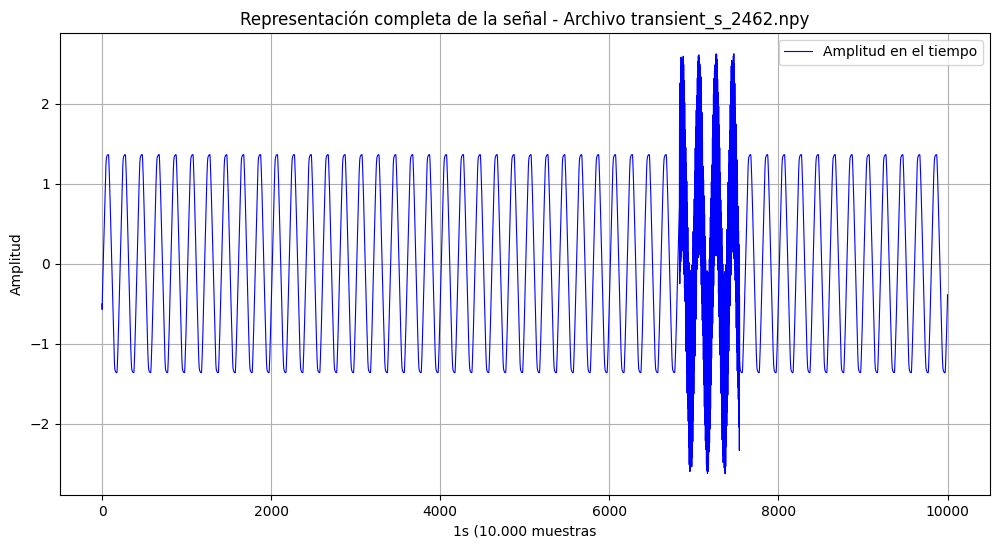

In [3]:
# Generar un número aleatorio entre 1 y 3600 para seleccionar el archivo
import random

archivo_numero = random.randint(1, 2520)
archivo_path = os.path.join(os.getcwd(), 'transient_signals','train', f'transient_s_{archivo_numero}.npy')

# Cargar el archivo completo
signal_data = np.load(archivo_path)

# Graficar todos los datos de la señal
plt.figure(figsize=(12, 6))
plt.plot(signal_data, color='b', linestyle='-', linewidth=0.8, label='Amplitud en el tiempo')
plt.title(f"Representación completa de la señal - Archivo transient_s_{archivo_numero}.npy")
plt.xlabel("1s (10.000 muestras")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()